<a href="https://colab.research.google.com/github/pushp0119/UML-501-ML/blob/main/MLassign8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

Part A

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

sns.set(style="whitegrid")

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data shapes — X_train:", X_train.shape, "X_test:", X_test.shape)

Data shapes — X_train: (120, 4) X_test: (30, 4)


Part B

In [ ]:
models = {
    "linear": Pipeline([("scaler", StandardScaler()), ("svc", svm.SVC(kernel="linear", probability=False, random_state=42))]),
    "poly_deg3": Pipeline([("scaler", StandardScaler()), ("svc", svm.SVC(kernel="poly", degree=3, probability=False, random_state=42))]),
    "rbf": Pipeline([("scaler", StandardScaler()), ("svc", svm.SVC(kernel="rbf", probability=False, random_state=42))])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Trained {name} SVM")

Trained linear SVM
Trained poly_deg3 SVM
Trained rbf SVM


Part C

In [ ]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average="macro", zero_division=0)
    report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        "accuracy": acc,
        "precision_macro": prec_macro,
        "recall_macro": rec_macro,
        "f1_macro": f1_macro,
        "report": report,
        "confusion_matrix": cm
    }
    print(f"\n=== Results for {name} SVM ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec_macro:.4f}")
    print(f"Recall    (macro): {rec_macro:.4f}")
    print(f"F1-score  (macro): {f1_macro:.4f}")
    print("\nClassification report:\n", report)
    print("Confusion matrix:\n", cm)


=== Results for linear SVM ===
Accuracy: 1.0000
Precision (macro): 1.0000
Recall    (macro): 1.0000
F1-score  (macro): 1.0000

Classification report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000        10
   virginica     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

=== Results for poly_deg3 SVM ===
Accuracy: 0.9000
Precision (macro): 0.9231
Recall    (macro): 0.9000
F1-score  (macro): 0.8977

Classification report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.7692    1.0000    0.8696        10
   virginica     1.0000    0.7000    0.8235        10

    accuracy                         0

Part D

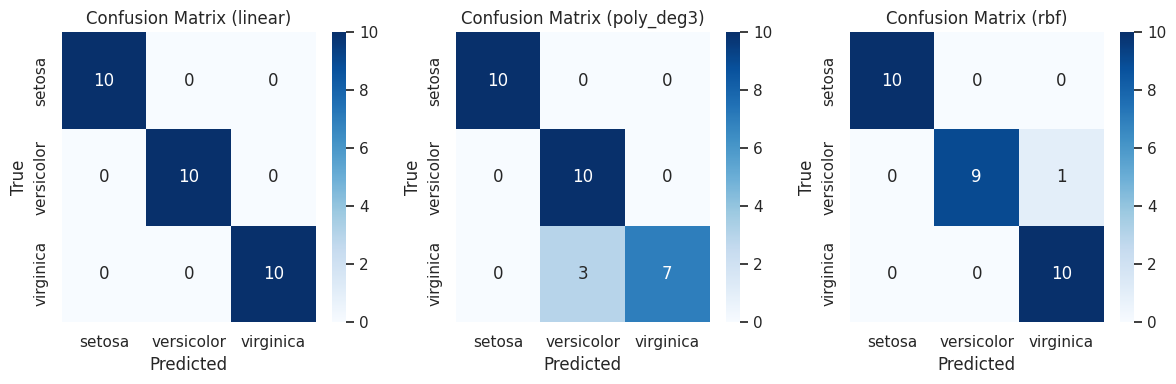

In [ ]:
plt.figure(figsize=(12, 4))
for i, (name, info) in enumerate(results.items(), 1):
    cm = info["confusion_matrix"]
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({name})")
plt.tight_layout()
plt.show()

Part E

In [ ]:
summary = pd.DataFrame({
    name: {
        "accuracy": info["accuracy"],
        "precision_macro": info["precision_macro"],
        "recall_macro": info["recall_macro"],
        "f1_macro": info["f1_macro"]
    } for name, info in results.items()
}).T

print("\nSummary metrics (rows = kernel):")
print(summary.round(4))

best_by_f1 = summary["f1_macro"].idxmax()
print(f"\nBest kernel by macro F1-score: {best_by_f1}")
print("Reasoning (brief):")
print("- The Iris dataset is low-dimensional and nearly linearly separable for some classes.")
print("- Linear kernel often performs very well when classes are (approximately) linearly separable.")
print("- Polynomial may capture some nonlinear boundaries but can overfit if degree is high.")
print("- RBF is flexible and can model complex boundaries; if data is small and separable, it may tie with linear or slightly outperform it depending on parameter choices.")
print("\nYou can further tune C and gamma (for RBF) or degree/coefficient (for poly) to improve performance.")


Summary metrics (rows = kernel):
           accuracy  precision_macro  recall_macro  f1_macro
linear       1.0000           1.0000        1.0000    1.0000
poly_deg3    0.9000           0.9231        0.9000    0.8977
rbf          0.9667           0.9697        0.9667    0.9666

Best kernel by macro F1-score: linear
Reasoning (brief):
- The Iris dataset is low-dimensional and nearly linearly separable for some classes.
- Linear kernel often performs very well when classes are (approximately) linearly separable.
- Polynomial may capture some nonlinear boundaries but can overfit if degree is high.
- RBF is flexible and can model complex boundaries; if data is small and separable, it may tie with linear or slightly outperform it depending on parameter choices.

You can further tune C and gamma (for RBF) or degree/coefficient (for poly) to improve performance.


Question 2

Part A

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Part B

In [ ]:
svm_no_scale = SVC(kernel="rbf", gamma="scale", random_state=42)
svm_no_scale.fit(X_train, y_train)

train_pred_no = svm_no_scale.predict(X_train)
test_pred_no = svm_no_scale.predict(X_test)

train_acc_no = accuracy_score(y_train, train_pred_no)
test_acc_no = accuracy_score(y_test, test_pred_no)

print("\nSVM without scaling")
print("Training accuracy:", round(train_acc_no, 4))
print("Testing accuracy :", round(test_acc_no, 4))

Part B(With Scaling)

In [ ]:
from sklearn.svm import SVC
svm_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma="scale", random_state=42))
])

svm_scaled.fit(X_train, y_train)

train_pred_scaled = svm_scaled.predict(X_train)
test_pred_scaled = svm_scaled.predict(X_test)

train_acc_scaled = accuracy_score(y_train, train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, test_pred_scaled)

print("\nSVM with scaling")
print("Training accuracy:", round(train_acc_scaled, 4))
print("Testing accuracy :", round(test_acc_scaled, 4))


SVM with scaling
Training accuracy: 0.975
Testing accuracy : 0.9667


Part C

In [ ]:
print("\nDiscussion on feature scaling:")
print("- RBF SVM is distance-based, so unscaled features distort distances.")
print("- Breast cancer features have very different ranges (e.g., radius_mean vs. smoothness).")
print("- Without scaling, large-range features dominate the kernel computation.")
print("- With StandardScaler, all features contribute equally, usually improving performance.")


Discussion on feature scaling:
- RBF SVM is distance-based, so unscaled features distort distances.
- Breast cancer features have very different ranges (e.g., radius_mean vs. smoothness).
- Without scaling, large-range features dominate the kernel computation.
- With StandardScaler, all features contribute equally, usually improving performance.
